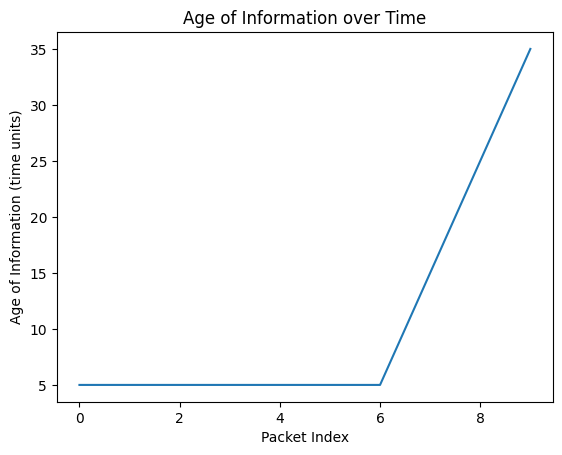

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def age_of_information(arrival_times, departure_times, current_time):
    aoi = []
    for i in range(len(departure_times)):
        aoi.append(max(0, current_time - arrival_times[i]) + departure_times[i] - current_time)
    return aoi

arrival_times = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
departure_times = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
current_time = 60

aoi = age_of_information(arrival_times, departure_times, current_time)

plt.plot(np.arange(len(aoi)), aoi)
plt.xlabel('Packet Index')
plt.ylabel('Age of Information (time units)')
plt.title('Age of Information over Time')
plt.show()


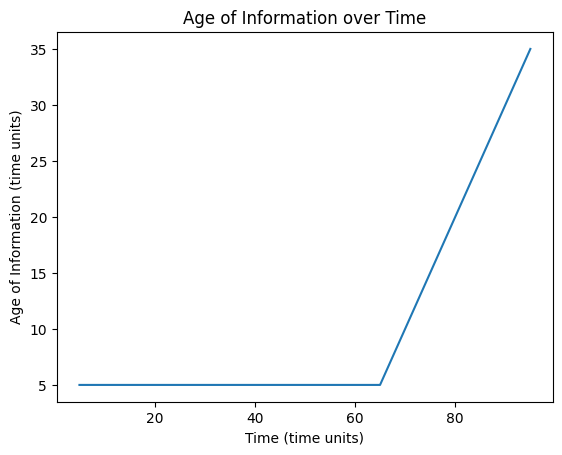

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def age_of_information(arrival_times, departure_times, current_time):
    aoi = []
    for i in range(len(departure_times)):
        aoi.append(max(0, current_time - arrival_times[i]) + departure_times[i] - current_time)
    return aoi

arrival_times = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
departure_times = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
current_time = 60

aoi = age_of_information(arrival_times, departure_times, current_time)

plt.plot(departure_times, aoi)
plt.xlabel('Time (time units)')
plt.ylabel('Age of Information (time units)')
plt.title('Age of Information over Time')
plt.show()


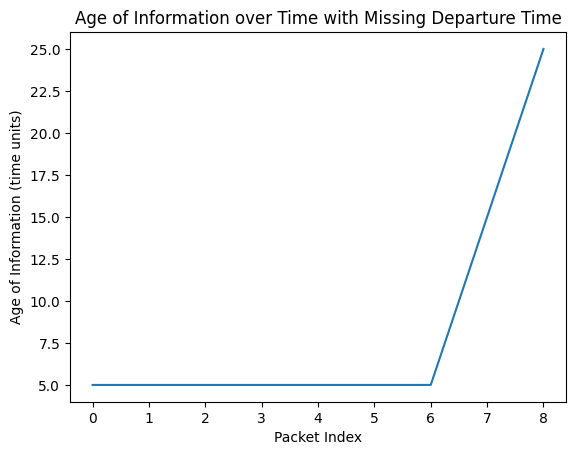

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def age_of_information(arrival_times, departure_times, current_time):
    aoi = []
    for i in range(len(departure_times)):
        if departure_times[i] is None:
            continue
        aoi.append(max(0, current_time - arrival_times[i]) + departure_times[i] - current_time)
    return aoi

arrival_times = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
departure_times = [5, 15, 25, 35, 45, 55, 65, 75, 85, None]
current_time = 60

aoi = age_of_information(arrival_times, departure_times, current_time)

plt.plot(np.arange(len(aoi)), aoi)
plt.xlabel('Packet Index')
plt.ylabel('Age of Information (time units)')
plt.title('Age of Information over Time with Missing Departure Time')
plt.show()


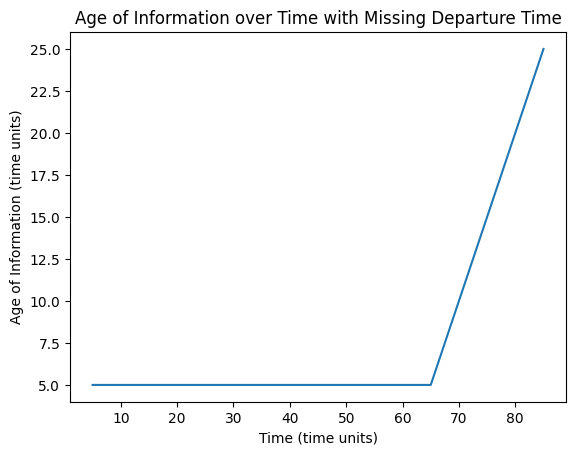

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def age_of_information(arrival_times, departure_times, current_time):
    aoi = []
    departure_times_valid = []
    for i in range(len(departure_times)):
        if departure_times[i] is None:
            continue
        aoi.append(max(0, current_time - arrival_times[i]) + departure_times[i] - current_time)
        departure_times_valid.append(departure_times[i])
    return aoi, departure_times_valid

arrival_times = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
departure_times = [5, 15, None, None, 45, 55, 65, 75, 85, None]
current_time = 60

aoi, departure_times_valid = age_of_information(arrival_times, departure_times, current_time)

plt.plot(departure_times_valid, aoi)
plt.xlabel('Time (time units)')
plt.ylabel('Age of Information (time units)')
plt.title('Age of Information over Time with Missing Departure Time')
plt.show()


Average age of information  when  time slots are [2,3,4,5], [1,2,3,4]: 1.3


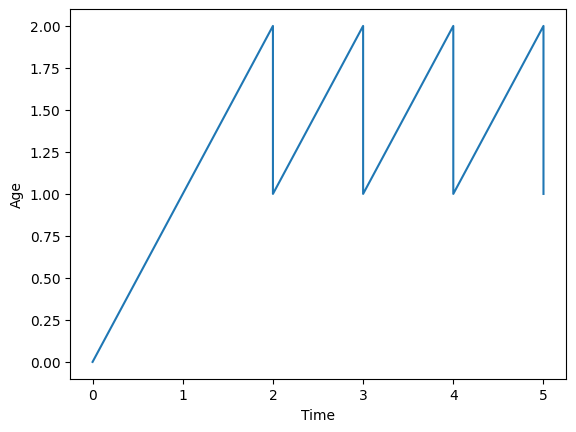

In [10]:
def average_age_of_information_function(arrival_time, departure_time):
    import numpy as np
    import matplotlib.pyplot as plt
    import itertools
    from scipy.integrate import simpson
    import sys

    # arrival times of the packets
    arrival_times = arrival_time
    # departure times of the packets
    departure_times = departure_time
    
    # check if number of arrival and departure times are equal and not zero
    if np.size(departure_times) != np.size(arrival_times) or np.size(departure_times) == 0 or np.size(arrival_times) == 0:
        print("Error: The number of elements in departure times and arrival times should be equal and non-zero")
        sys.exit()

    # initializing an array to store the times
    times = np.append(departure_times, (arrival_times[-1]))
    # adding a zero at the beginning of the times array
    times = np.append([0], times)
    
    # index to keep track of arrival times
    ii = 0
    offset = 0
    # creating an array to store the ages
    age = times.copy()
    agep = np.zeros(np.size(departure_times))

    # length of the times array
    lent = len(times)
    # loop through the times array
    for i in range(1, lent):
        # if the current time is equal to an arrival time
        if times[i] == arrival_times[ii]:
            # store the departure time
            offset = departure_times[ii]
            ii += 1
            # subtract the offset from the current time
            age[i] = age[i] - offset

    # size of the departure times array
    k = np.size(departure_times)
    agep[0] = arrival_times[0]
    # loop through the departure times array
    for i in range(1, k):
        # calculate the difference between the arrival and departure times
        agep[i] = arrival_times[i] - departure_times[i - 1]

    # repeat the times array twice
    new_times = np.repeat(times, 2)
    # concatenate the age values and age differences
    new_age_differences = np.append((age[1]), agep)
    # add a zero at the beginning of the new_age_differences array
    new_age_differences = np.append([0], new_age_differences)
    # flatten the two arrays into a single array
    final = list(itertools.chain.from_iterable(zip(new_age_differences, age)))

    # calculate the average age of information
    average_age = np.trapz(final, new_times) / np.max(new_times)
    return [average_age, new_times, final]


def print_average_age_example():
    from agenet import average_age_of_information
    
    average_age, _, _ = average_age_of_information.average_age_of_information_function([2, 3, 4, 5], [1, 2, 3])



def printageex():
    from agenet import av_age

    av_age_fn, _, _ = av_age.av_age_func([2, 3, 4, 5], [1, 2, 3, 4]) 
    print(
        "Average age of information  when  time slots are [2,3,4,5], [1,2,3,4]:", 
        av_age_fn,
    )


def plotageex():
    from agenet import av_age
    import matplotlib.pyplot as plt

    av_age_print, newtimesex, final = av_age.av_age_func([2, 3, 4, 5], [1, 2, 3, 4])
    print(
        "Average age of information  when  time slots are [2,3,4,5], [1,2,3,4]:",
        av_age_print,
    )
    plt.plot(newtimesex, final)
    plt.xlabel("Time")
    plt.ylabel("Age")
    plt.show()


plotageex()
